In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\heart_attack_risk_dataset.csv")
df.head(3)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low


In [4]:
df.shape

(50000, 20)

In [5]:
df.isnull().sum()

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64

In [6]:
df.Heart_Attack_Risk.value_counts()

Heart_Attack_Risk
Low         25024
Moderate    14904
High        10072
Name: count, dtype: int64

In [7]:
df.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


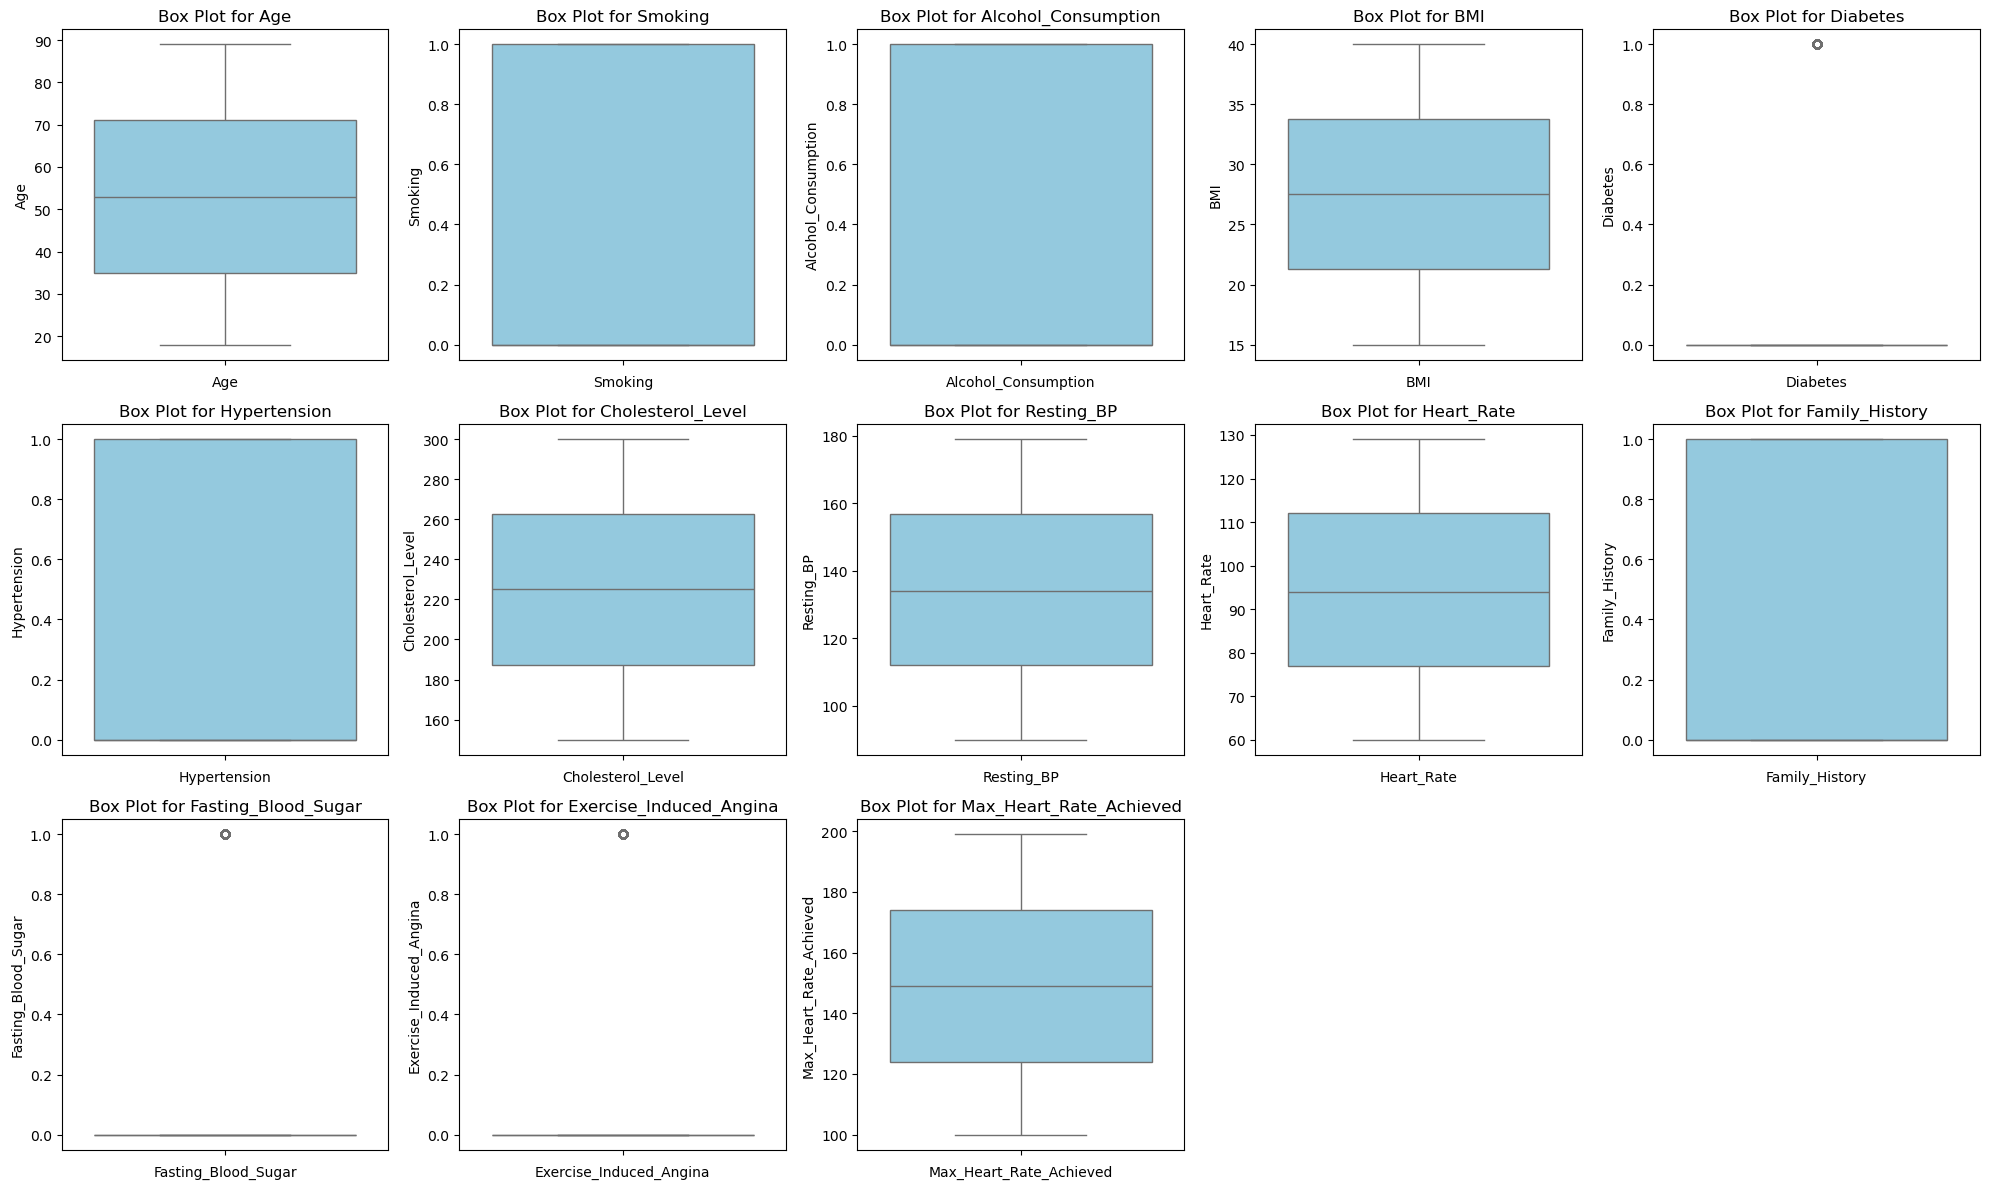

In [8]:
columns = ['Age', 'Smoking', 'Alcohol_Consumption', 'BMI', 'Diabetes', 'Hypertension', 
           'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History', 
           'Fasting_Blood_Sugar', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved']

fig, axes = plt.subplots(3, 5, figsize=(20, 12), sharey=False) 

# Flatten axes and loop through columns
axes = axes.flatten()  # Convert 2D axes array to 1D for easy iteration
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel(col)

# Hide remaining empty subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
df.Heart_Attack_Risk = df.Heart_Attack_Risk.map({'Low':1,'Moderate':2,'High':3})

In [10]:
df.head(2)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,1
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,2


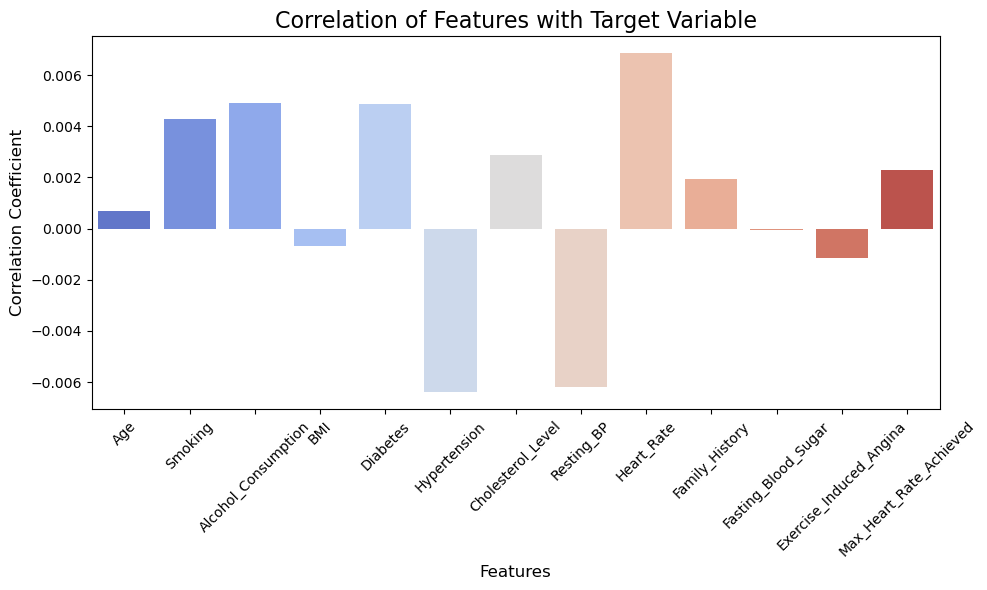

In [11]:
# Compute correlation with the target variable
correlation = df[columns + ['Heart_Attack_Risk']].corr()['Heart_Attack_Risk'].drop('Heart_Attack_Risk')

# Plot correlation using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation of Features with Target Variable', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
df.Gender = df.Gender.map({'Male':1,'Female':2})
df.Physical_Activity_Level = df.Physical_Activity_Level.map({'Low':1,'Moderate':2,'High':3})
df.Stress_Level = df.Stress_Level.map({'Low':1,'Moderate':2,'High':3})
df.Chest_Pain_Type = df.Chest_Pain_Type.map({'Typical':1,'Atypical':2,'Non-anginal':3,'Asymptomatic':4})
df.Thalassemia = df.Thalassemia.map({'Normal':1,'Fixed defect':2,'Reversible defect':3})
df.ECG_Results = df.ECG_Results.map({'Normal':1,'ST-T abnormality':2,'Left Ventricular Hypertrophy':3})

In [13]:
df.head(3)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,2,1,0,2,34.61,1,0,152.1,171,85,0,2,3,3,0,1,0,114,1
1,32,1,0,0,2,22.75,0,0,166.8,126,103,0,1,4,1,0,2,0,173,2
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,1,3,0,2,0,109,1


In [14]:
X= df.drop("Heart_Attack_Risk",axis=1)
y=df['Heart_Attack_Risk']

In [15]:
scaler = MinMaxScaler() 
X=scaler.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report ")
print(report)

Classification Report 
              precision    recall  f1-score   support

           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930
           3       0.00      0.00      0.00      1987

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000



In [19]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model1.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report ")
print(report)

Classification Report 
              precision    recall  f1-score   support

           1       0.51      0.49      0.50      5083
           2       0.30      0.31      0.30      2930
           3       0.20      0.21      0.20      1987

    accuracy                           0.38     10000
   macro avg       0.34      0.33      0.33     10000
weighted avg       0.39      0.38      0.38     10000



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, accuracy_score
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of the tree (default None for no limit)
    random_state=42,   # Ensures reproducibility
    class_weight='balanced'  # Handles class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[4895  181    7]
 [2824  101    5]
 [1901   79    7]]

Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.96      0.67      5083
           2       0.28      0.03      0.06      2930
           3       0.37      0.00      0.01      1987

    accuracy                           0.50     10000
   macro avg       0.39      0.33      0.24     10000
weighted avg       0.41      0.50      0.36     10000


Accuracy Score:
0.5003
